In [65]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib for plotting

import re # regular expressions

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
plt.rcParams['figure.figsize'] = [16, 10] #set default figure size


In [66]:
data = pd.read_csv('../data/train.csv')

In [67]:
weather = pd.read_csv('../data/weather.csv')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [69]:
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data.loc[:, 'pickup_date'] = data['pickup_datetime'].dt.date
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

#convert the following into a binary 1 indicator column
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag.values == 'Y')

In [70]:
long_trip = data['trip_duration'].max() // 3600
print('The longest recorded ride in the dataset (in hours): ' + str(long_trip) )

The longest recorded ride in the dataset (in hours): 979


In [71]:
short_trip = data['trip_duration'].min() // 3600
print('The shortest recorded ride in the dataset (in hours): ' + str(short_trip) )

The shortest recorded ride in the dataset (in hours): 0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null int32
trip_duration         1458644 non-null int64
pickup_date           1458644 non-null object
dtypes: datetime64[ns](2), float64(4), int32(1), int64(3), object(2)
memory usage: 128.0+ MB


In [73]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26


Trip duration is in seconds

In [74]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,5.515396e-03,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,7.406066e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,0.000000e+00,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,0.000000e+00,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,0.000000e+00,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,3.526282e+06


small note here that it seems very unlikely that the maximum trip duration was 3.5M seconds long (10+ hours), and the minimum trip duration also 1 second long. The trips with these values must have been recorded as a mistake. 

In [75]:
weather.head(60)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0
5,6-1-2016,41,25,33.0,0.00,0.0,0
6,7-1-2016,46,31,38.5,0.00,0.0,0
7,8-1-2016,46,31,38.5,0.00,0.0,0
8,9-1-2016,47,40,43.5,T,0.0,0
9,10-1-2016,59,40,49.5,1.80,0.0,0


In [76]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
date                   366 non-null object
maximum temperature    366 non-null int64
minimum temperature    366 non-null int64
average temperature    366 non-null float64
precipitation          366 non-null object
snow fall              366 non-null object
snow depth             366 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 20.1+ KB


on a side note, it seems in 2016, there was a February 29th, which makes for 366 days in a year.

In [77]:
weather.date =  pd.to_datetime(weather.date)

In [78]:
weather['precipitation'].unique()


array(['0.00', 'T', '1.80', '0.24', '0.05', '0.01', '2.31', '0.73',
       '0.53', '0.44', '1.01', '0.03', '0.30', '1.22', '0.02', '0.14',
       '0.11', '0.06', '0.29', '0.07', '0.04', '0.38', '0.16', '0.09',
       '0.47', '0.20', '0.61', '0.54', '0.25', '0.18', '1.65', '0.40',
       '0.91', '0.45', '0.22', '0.12', '0.83', '0', '0.49', '0.66',
       '0.08', '0.62', '0.35', '1', '1.09', '1.08', '0.15', '0.32',
       '0.82', '0.31', '0.5', '0.56', '0.68', '0.2', '0.4', '0.23',
       '0.55', '1.11', '1.41', '1.81', '2.2', '0.19', '0.39'],
      dtype=object)

Weather data collected from the National Weather Service. It contains the first six months of 2016, for a weather station in central park. It contains for each day the minimum temperature, maximum temperature, average temperature, precipitation, new snow fall, and current snow depth. The temperature is measured in Fahrenheit and the depth is measured in inches. T means that there is a trace of precipitation.

For our purposes, T is as good as 0, since it is not quantifiable.

In [79]:
weather['precipitation'] = np.where(weather['precipitation']=='T', '0.00',weather['precipitation'])
weather['precipitation'] = list(map(float, weather['precipitation']))

In [80]:
weather['snow fall'] = np.where(weather['snow fall']=='T', '0.00',weather['snow fall'])
weather['snow fall'] = list(map(float, weather['snow fall']))
weather['snow depth'] = np.where(weather['snow depth']=='T', '0.00',weather['snow depth'])
weather['snow depth'] = list(map(float, weather['snow depth']))

In [81]:
data['date'] = pd.to_datetime(data['pickup_date'])
train = pd.merge(data, weather[['date','minimum temperature', 'precipitation', 'snow fall', 'snow depth']], on= 'date', how = 'left')
data.shape[0]

1458644

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
id                     1458644 non-null object
vendor_id              1458644 non-null int64
pickup_datetime        1458644 non-null datetime64[ns]
dropoff_datetime       1458644 non-null datetime64[ns]
passenger_count        1458644 non-null int64
pickup_longitude       1458644 non-null float64
pickup_latitude        1458644 non-null float64
dropoff_longitude      1458644 non-null float64
dropoff_latitude       1458644 non-null float64
store_and_fwd_flag     1458644 non-null int32
trip_duration          1458644 non-null int64
pickup_date            1458644 non-null object
date                   1458644 non-null datetime64[ns]
minimum temperature    1458644 non-null int64
precipitation          1458644 non-null float64
snow fall              1458644 non-null float64
snow depth             1458644 non-null float64
dtypes: datetime64[ns](3), float64(7), int32(1), int64(4), obj

In [83]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)

In [84]:
#getting rid of data points where the trip duration is more than 2 std. dev. away from the mean.
#plotting the log(trip duration) shows us that the distribution is roughhly normal.
#even with this filter, we can expect to retain about 95% of the orginal dataset.

m = np.mean(train['trip_duration'])
s = np.std(train['trip_duration'])
train = train[train['trip_duration'] <= m + 2*s]
train = train[train['trip_duration'] >= m - 2*s]

In [85]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,minimum temperature,precipitation,snow fall,snow depth,log_trip_duration
count,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06,1.456540e+06
mean,1.534291e+00,1.663941e+00,-7.397349e+01,4.075093e+01,-7.397342e+01,4.075180e+01,5.523364e-03,8.368576e+02,4.673203e+01,8.851502e-02,5.855967e-02,4.064042e-01,6.460025e+00
std,4.988229e-01,1.313611e+00,7.091177e-02,3.286533e-02,7.067435e-02,3.588810e-02,7.411383e-02,6.589297e+02,1.571627e+01,2.336874e-01,9.393728e-01,2.246270e+00,7.748918e-01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.931472e-01
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,0.000000e+00,3.970000e+02,3.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.986452e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,0.000000e+00,6.620000e+02,4.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,6.496775e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,0.000000e+00,1.073000e+03,6.100000e+01,4.000000e-02,0.000000e+00,0.000000e+00,6.979145e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,1.141100e+04,7.500000e+01,2.310000e+00,2.730000e+01,2.200000e+01,9.342421e+00


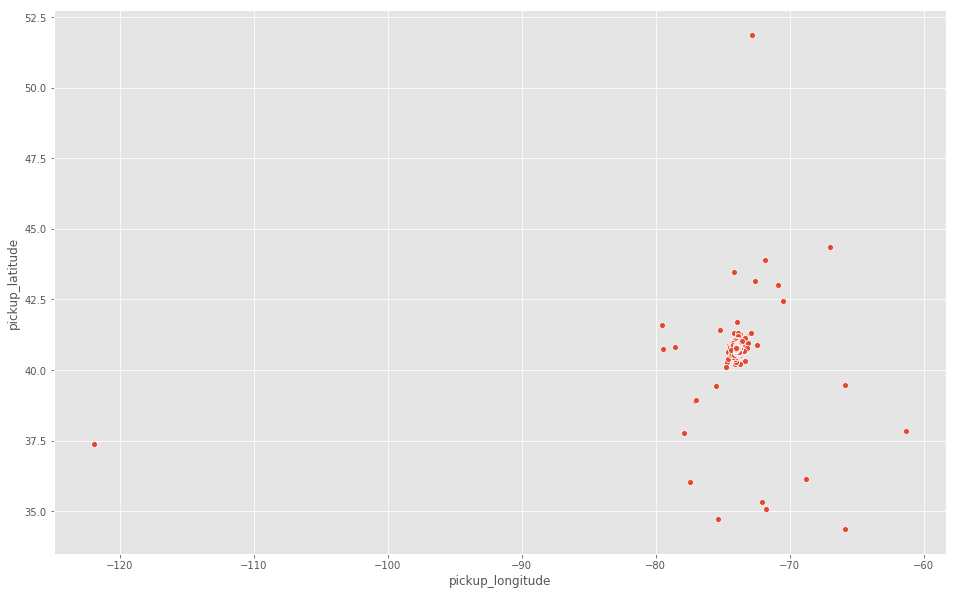

In [86]:
sns.scatterplot('pickup_longitude', 'pickup_latitude', data=train)

alot of them are centered around new york city, but some data points seem to be coming from afar. Filtering with the known geolocation coordinates for NYC we get the following:

the borders of NYC<br>
city_long_border = (-74.03, -73.75) <br>
city_lat_border = (40.63, 40.85) 

In [87]:
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]
train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]
train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]
train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

In [88]:
train.shape[0]

1436572

we still have more than 1.43M data observations.

In [90]:
train.to_csv('../data/clean_train.csv')

Now apply the same cleaning to the "test.csv" file, so that we don't have to do it later.

In [91]:
test = pd.read_csv('../data/test.csv')

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 10 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null datetime64[ns]
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
pickup_date           625134 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 47.7+ MB


In [94]:
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)
test.loc[:, 'pickup_date'] = test['pickup_datetime'].dt.date

#convert the following into a binary 1 indicator column
test['store_and_fwd_flag'] = 1 * (test.store_and_fwd_flag.values == 'Y')

In [96]:
test['date'] = pd.to_datetime(test['pickup_date'])
test_merge = pd.merge(test, weather[['date','minimum temperature', 'precipitation', 'snow fall', 'snow depth']], on= 'date', how = 'left')

In [97]:
test.to_csv('../data/clean_test.csv')